In [1]:
# influence of high leverage points


In [2]:
import graphlab


In [3]:
sales = graphlab.SFrame.read_csv('C:\Users\Iskndraniii73\MachineLearning\Course2\Dataset\Philadelphia_Crime_Rate_noNA.csv');

This non-commercial license of GraphLab Create for academic use is assigned to omar.alaskndrani@student.guc.edu.eg and will expire on May 02, 2021.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\ISKNDR~1\AppData\Local\Temp\graphlab_server_1597166772.log.0


Finished parsing file C:\Users\Iskndraniii73\MachineLearning\Course2\Dataset\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.076051 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\Iskndraniii73\MachineLearning\Course2\Dataset\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.028009 secs.

In [4]:
sales


HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


In [5]:
# Exploring Dataset

In [6]:
graphlab.canvas.set_target('ipynb')

In [7]:
sales.show(view='Scatter Plot',x='CrimeRate',y='HousePrice')

In [8]:
crime_model = graphlab.linear_regression.create(sales,target='HousePrice',features=['CrimeRate'])

Linear regression:

--------------------------------------------------------

Number of examples          : 99

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.135362     | 314982.574662      | 83468.940148  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

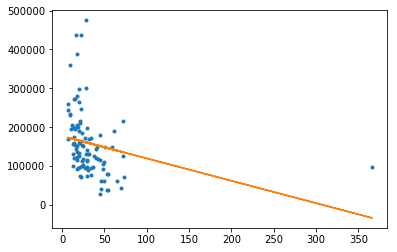

In [12]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',sales['CrimeRate'],crime_model.predict(sales),'-')

In [14]:
# So note the influence of the point at the end --> Influence of high leverage points  -> leverage means (نفوذ او سلطة)
#meaning that this single point has a high influence on the prediction as it makes the line with that slope to count for it
# and if does not exist the line will differ alot from that one

In [16]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]

In [17]:
sales_noCC.show(view='Scatter Plot',x='CrimeRate',y='HousePrice')

In [19]:
indp_crime_model = graphlab.linear_regression.create(sales_noCC,target='HousePrice',features=['CrimeRate'])

Linear regression:

--------------------------------------------------------

Number of examples          : 98

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.000000     | 315335.534886      | 78052.676125  |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

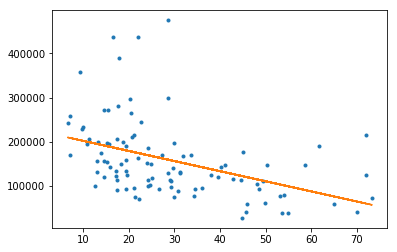

In [21]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',sales_noCC['CrimeRate'],indp_crime_model.predict(sales_noCC),'-')

In [22]:
# comparing the coefficients of the two lines


In [23]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [24]:
indp_crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [25]:
# leverage point: extreme point where there are no points near to it

# but for this extrem point to have a great influence --> it should not follow the trend of the data --- as if it were following
# the trend then removing won't change the data

# other High influencing points can be those who have (very far y) values comparing to their mates with the same x vlaue